# Optimizing a Stock Portfolio
***
 - Using the historical volatility and mean return, optimize the daily stock strategy to minimize the risk for a return of at least 0.05% (assume you must spend all available funds). For this you can assume no transaction costs to buy or sell stocks, so you just need to recommend what percent of a portfolio should be allocated to each stock. 
 - Create the efficient frontier and provide the graph, along with some strategy on portfolio options for different levels of risk
 
Some of the code for this notebook was retrieved from the following [GitHub Repository.](https://github.com/austingriffith94/simple_portfolio_optimization/blob/master/port_opt_nb/port_opt.ipynb)

## Objective Function and Constraints  

$$\begin{array}{rll}
 \text{min.} & \mathbf{p \sigma p^T}  \\
 \text{s.t.} & \mathbf{pr^T} \ge .0005 \\
 & \mathbf{pj^T} = 1
 \end{array}
$$

$$
 \mathbf{p} = \begin{bmatrix} p_1 & p_2 & p_3 & p_4 & p_5 \end{bmatrix} \\
$$  

$$
 \mathbf{r} = \begin{bmatrix} r_1 & r_2 & r_3 & r_4 & r_5 \end{bmatrix} \\
$$ 

$$
 \mathbf{\sigma} = \begin{bmatrix}
 \sigma_{11} & \sigma_{12} & \sigma_{13} & \sigma_{14} & \sigma_{15} \\
 \sigma_{21} & \sigma_{22} & \sigma_{23} & \sigma_{24} & \sigma_{25} \\
 \sigma_{31} & \sigma_{32} & \sigma_{33} & \sigma_{34} & \sigma_{35} \\
 \sigma_{41} & \sigma_{42} & \sigma_{43} & \sigma_{44} & \sigma_{45} \\
 \sigma_{51} & \sigma_{52} & \sigma_{53} & \sigma_{54} & \sigma_{55} \\
 \end{bmatrix} \\
$$ 

$$
 \mathbf{j} = \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \end{bmatrix} \\
$$ 

## Load data

In [1]:
# load data
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import numpy as np
from gurobipy import *
import math
import os
import matplotlib.pyplot as plt
df = pd.read_csv(
    r'C:\Users\Ryan Weisner\Documents\MSA_ALL\Optimization\class project\stocks.csv')

# interactive shell for returning all outputs for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Inspect data

In [2]:
# inspect data
df.head()

,Date,STX Close,STX Change,FTV Close,FTV Change,NOW Close,NOW Change,IT Close,IT Change,AMD Close,AMD Change
0,1/2/19,39.0800,0.0127,67.3500,-0.0046,178.3200,0.0056,125.8500,-0.0156,18.8300,0.0200
1,1/3/19,36.5200,-0.0655,64.6300,-0.0404,169.1200,-0.0516,123.1900,-0.0211,17.0500,-0.0945
2,1/4/19,38.1400,0.0444,67.4600,0.0438,179.2300,0.0598,126.3600,0.0257,19.0000,0.1144
3,1/7/19,39.1600,0.0267,67.8000,0.0050,186.6700,0.0415,126.3400,-0.0002,20.5700,0.0826
4,1/8/19,39.1400,-0.0005,68.1100,0.0046,188.1100,0.0077,128.4600,0.0168,20.7500,0.0088


## Rename columns

In [3]:
df = df.rename(columns = {'Date': 'date', 
                         'STX Close': 'stx_price',
                         'STX Change ': 'stx_return',
                         'FTV Close': 'ftv_price',
                         'FTV Change ': 'ftv_return',
                         'NOW Close': 'now_price',
                         'NOW Change': 'now_return',
                         'IT Close': 'it_price',
                         'IT Change': 'it_return',
                         'AMD Close': 'amd_price',
                         'AMD Change ': 'amd_return'})

df.head()
print('the data has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

,date,stx_price,stx_return,ftv_price,ftv_return,now_price,now_return,it_price,it_return,amd_price,amd_return
0,1/2/19,39.0800,0.0127,67.3500,-0.0046,178.3200,0.0056,125.8500,-0.0156,18.8300,0.0200
1,1/3/19,36.5200,-0.0655,64.6300,-0.0404,169.1200,-0.0516,123.1900,-0.0211,17.0500,-0.0945
2,1/4/19,38.1400,0.0444,67.4600,0.0438,179.2300,0.0598,126.3600,0.0257,19.0000,0.1144
3,1/7/19,39.1600,0.0267,67.8000,0.0050,186.6700,0.0415,126.3400,-0.0002,20.5700,0.0826
4,1/8/19,39.1400,-0.0005,68.1100,0.0046,188.1100,0.0077,128.4600,0.0168,20.7500,0.0088


the data has 273 rows and 11 columns


## Check for missing data

In [4]:
df.isnull().sum()

date          0
stx_price     0
stx_return    0
ftv_price     0
ftv_return    0
now_price     0
now_return    0
it_price      0
it_return     0
amd_price     0
amd_return    0
dtype: int64

## Visualize data

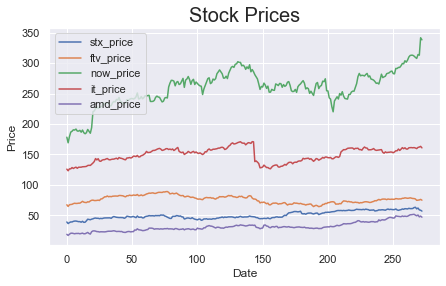

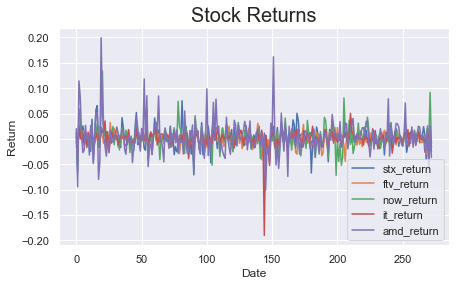

In [5]:
# visualize data
import sys
if 'seaborn' not in sys.modules:
    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

labels = []
plt.figure(figsize = (7, 4));
# plt.subplot(2,1,1);
for col in df.columns:
    if 'price' in col:
        graph = sns.lineplot(data = df[col]);
        labels.append(col)
    
graph = plt.title('Stock Prices', fontdict= {'fontsize': 20});
graph = plt.xlabel('Date');
graph = plt.ylabel('Price');
graph = plt.legend(labels = labels);

labels = []
plt.figure(figsize = (7, 4));
for col in df.columns:
    if 'return' in col:
        ret = sns.lineplot(data = df[col]);
        labels.append(col)
    
ret = plt.title('Stock Returns', fontdict= {'fontsize': 20});
ret = plt.xlabel('Date');
ret = plt.ylabel('Return');
ret = plt.legend(labels = labels);

## Drop prices from dataframe

In [6]:
for col in df.columns:
    if 'price' in col:
        df = df.drop(columns=col)
    if 'date' in col:
        df = df.drop(columns=col)

df = df.reset_index(drop=True)

# stock names, to be used later
stocks = ['stx', 'ftv', 'now', 'it', 'amd']

In [7]:
df.columns
stocks

Index(['stx_return', 'ftv_return', 'now_return', 'it_return', 'amd_return'], dtype='object')

['stx', 'ftv', 'now', 'it', 'amd']

## Summary statistics

In [8]:
# summary statistics 
pd.DataFrame.from_dict({
    'Mean Returns': df.mean(), 'Standard Deviation of Returns': df.std()})

# summary statistics of the data
avg = df.mean()
std = df.std()
cov = df.cov()

print('\t\t\tCovariance Matrix')
cov

,Mean Returns,Standard Deviation of Returns
stx_return,0.0016,0.0196
ftv_return,0.0005,0.0138
now_return,0.0026,0.0224
it_return,0.0010,0.0164
amd_return,0.0040,0.0334


			Covariance Matrix


,stx_return,ftv_return,now_return,it_return,amd_return
stx_return,0.0004,0.0001,0.0001,0.0001,0.0003
ftv_return,0.0001,0.0002,0.0001,0.0001,0.0002
now_return,0.0001,0.0001,0.0005,0.0001,0.0003
it_return,0.0001,0.0001,0.0001,0.0003,0.0001
amd_return,0.0003,0.0002,0.0003,0.0001,0.0011


## Initialize model

In [9]:
# initialize model
from gurobipy import *

model = Model('min_risk')

# labels and variables for each stock
col_names = df.columns
variables = pd.Series(model.addVars(col_names), index = col_names)

# determine the risk using the covariance matrix
port_risk = cov.dot(variables).dot(variables) # returns a gurobipy.QuadExpr object

Using license file C:\Users\Ryan Weisner\gurobi.lic
Academic license - for non-commercial use only


$$
 \text{port_risk} = \mathbf{p \sigma p^T} = \begin{bmatrix} p_1 & p_2 & p_3 & p_4 & p_5 \end{bmatrix}
 \begin{bmatrix}
 \sigma_{11} & \sigma_{12} & \sigma_{13} & \sigma_{14} & \sigma_{15} \\
 \sigma_{21} & \sigma_{22} & \sigma_{23} & \sigma_{24} & \sigma_{25} \\
 \sigma_{31} & \sigma_{32} & \sigma_{33} & \sigma_{34} & \sigma_{35} \\
 \sigma_{41} & \sigma_{42} & \sigma_{43} & \sigma_{44} & \sigma_{45} \\
 \sigma_{51} & \sigma_{52} & \sigma_{53} & \sigma_{54} & \sigma_{55} \\
 \end{bmatrix} 
 \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ p_4 \\ p_5 \end{bmatrix}
$$ 


## Set objective function and constraint

In [10]:
# objective function
model.setObjective(port_risk, GRB.MINIMIZE)

# constraints
# weights add up to 1
model.addConstr(variables.sum() == 1, 'weights')
model.update()

# mute output from model.optimize()
model.setParam('OutputFlag', 0) 
model.update()

# optimize model, find minimum risk portfolio while investing in each of the stocks
model.optimize()

<gurobi.Constr *Awaiting Model Update*>

In [11]:
# display stocks and respective weights
n = 0
weights = {}
for v in variables:
    weights.update({col_names[n]:v.x}) # v.x gets the optimum weight for variable v
    n = n + 1
weights = pd.DataFrame([weights])
weights = weights.transpose()
weights.columns = ['Weights']

print('\nMin Risk, Optimal Weights Per Stock\n------')
weights


Min Risk, Optimal Weights Per Stock
------


,Weights
stx_return,0.0956
ftv_return,0.5083
now_return,0.0750
it_return,0.3210
amd_return,0.0000


In [12]:
# organize dataframes
main = pd.concat([avg,std,weights],axis=1)
main.columns = ['Avg Return','Std','Weights']
main

,Avg Return,Std,Weights
stx_return,0.0016,0.0196,0.0956
ftv_return,0.0005,0.0138,0.5083
now_return,0.0026,0.0224,0.0750
it_return,0.0010,0.0164,0.3210
amd_return,0.0040,0.0334,0.0000


In [13]:
# minimum risk values

# optimal objective value
print('\nMinimized Portfolio Variance, Given W > 0 :\n------\n' + str(port_risk.getValue())) # variance 

# volatility
min_vol = math.sqrt(port_risk.getValue()) # standard deviation 
print('\n\nVolatility (Standard Deviation of Variance):\n------\n' + str(min_vol))

# expected return using optimized weights
port_return = avg.dot(variables)
Rmin = port_return.getValue() # this is the minimum return as well, because we minimized the risk first 
print('\n\nExpected Return, Given Optimized Weights (Rmin):\n------\n' + str(Rmin))


Minimized Portfolio Variance, Given W > 0 :
------
0.00013728555710328862


Volatility (Standard Deviation of Variance):
------
0.011716891955774305


Expected Return, Given Optimized Weights (Rmin):
------
0.000905797819906625


## Calculate Values of Efficient Frontier

In [14]:
# maximum return value among all stocks
Rmax = avg.max()

# constraint for returns
target = model.addConstr(port_return >= .0005, 'target')

# set right hand side of target value for returns
# iterate through the range of returns from Rmin to Rmax, minimizing the risk for each return value
eff = {}
iterations = 50
diff = (Rmax-Rmin)/(iterations-1)
Rrange = np.arange(Rmin, Rmax+diff, diff) # range of returns, from Rmin to Rmax, where each step = diff
for r in Rrange:
    target.rhs = r
    model.optimize()
    temp = math.sqrt(port_risk.getValue()) # standard deviation of the portfolio variance for the given rate of return r
    eff.update({temp:r})

# organize dataframe for efficient frontier
frontier = pd.DataFrame([eff]).transpose()
frontier.columns = ['Returns']
frontier['Risk'] = frontier.index
frontier = frontier.reset_index(drop=True)

# output and save values of efficient frontier
print('\nEfficient Frontier')
frontier.T


Efficient Frontier


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Returns,0.0009,0.0010,0.0010,0.0011,0.0012,0.0012,0.0013,0.0013,0.0014,0.0015,...,0.0034,0.0035,0.0035,0.0036,0.0037,0.0037,0.0038,0.0038,0.0039,0.0040
Risk,0.0117,0.0117,0.0118,0.0119,0.0120,0.0121,0.0123,0.0124,0.0126,0.0128,...,0.0251,0.0258,0.0266,0.0275,0.0284,0.0293,0.0303,0.0313,0.0324,0.0334


## Sharpe Ratio

In [15]:
# calculate sharpe ratio
frontier['Sharpe'] = frontier['Returns']/frontier['Risk']

# determine largest sharpe ratio
idx = frontier['Sharpe'].max()
sharpeMax = frontier.loc[frontier['Sharpe'] == idx]
sharpeMax = sharpeMax.reset_index(drop=True)

# determine stock weights that correspond to the max sharpe ratio
target.rhs = sharpeMax['Returns'][0]
model.optimize()

n = 0
sharpe_weights = {}
for v in variables:
    sharpe_weights.update({col_names[n]:v.x})
    n = n + 1
sharpe_weights = pd.DataFrame([sharpe_weights])
sharpe_weights = sharpe_weights.transpose()
sharpe_weights.columns = ['Weights']
sharpe_weights.index = stocks

# display and save max sharpe values
print('\nMaximum Sharpe Ratio')
sharpeMax

print('\nStock weights that correspond to the max sharpe ratio\n')
sharpe_weights


Maximum Sharpe Ratio


,Returns,Risk,Sharpe
0,0.0027,0.0194,0.1404



Stock weights that correspond to the max sharpe ratio



,Weights
stx,0.1510
ftv,0.0000
now,0.4508
it,0.0955
amd,0.3027


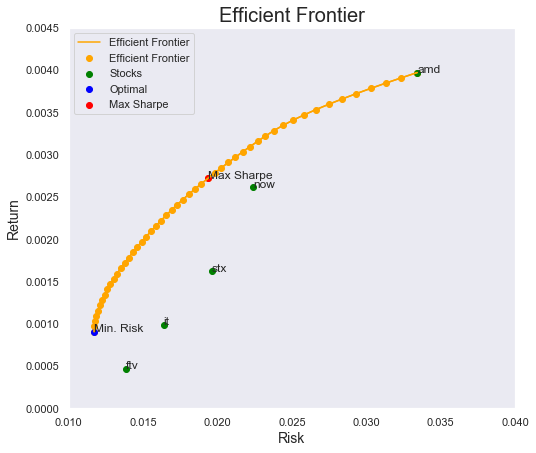

In [17]:
# plot of the efficient frontier from Rmin to Rmax
# initialize plot, set labels
fig, ax = plt.subplots(nrows=1,ncols=1);
fig.set_size_inches(8,7);
ax.set_title('Efficient Frontier',fontsize=20);
ax.set_xlabel('Risk',fontsize=14);
ax.set_ylabel('Return',fontsize=14);

# plot the efficient frontier
# do this first to allow individual points later on to overlay
ax.scatter(x=frontier['Risk'],y=frontier['Returns'],color='orange',label='Efficient Frontier');
ax.plot(frontier['Risk'],frontier['Returns'],color='orange');
temp = pd.DataFrame([eff]).transpose()
temp.columns = ['Efficient Frontier'];
temp.plot(color='orange',label='Efficient Frontier',ax=ax);

# average return/volatility for each individual stock
ax.scatter(x=std,y=avg,color='green',label='Stocks');
i = 0
for stock in stocks:
    ax.annotate(stock,(std[i],avg[i]))
    i = i + 1

# show the minimum risk portfolio
ax.scatter(x=min_vol,y=Rmin,color='blue',label='Optimal');
ax.annotate('Min. Risk',(min_vol,Rmin));

# show maximum sharpe value
ax.scatter(x=sharpeMax['Risk'],y=sharpeMax['Returns'],color='red',label='Max Sharpe');
ax.annotate('Max Sharpe',(sharpeMax['Risk'],sharpeMax['Returns']));

# additional edits to the graph
ax.grid();
ax.legend(loc='upper left');
ax.set_ylim(0, .0045);
ax.set_xlim(.01, .04);